# ---------------------------------------------------------------------------------------------------------------
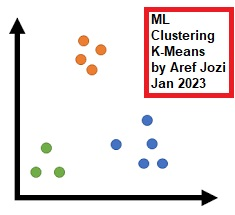

## Machine Learning Tutorials using Python
## Designed by : maktabkhooneh.org
## Tutor : Jadi Mirani
## Learner : Aref Jozi

#### This is my tutorial project of a dataset including some features about "customers" . The purpose is to identify their class/category (cluster) by unsupervised ML algorithms namely "K-Means" , "Hierarchical" , "DBSCAN" .
### this ipynb file is for : 1. K-Means

#### Done by Aref Jozi on Jan 2023

#### This project is designed by collaboration of maktabkhooneh and Jadi and represented in Season 4 (Clustering) of Machine Learning by Python
# ---------------------------------------------------------------------------------------------------------------

# 1.K-Means Clustering

### importing libraries

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import pandas as pd

### loading data from csv file and looking at its characteristics

In [2]:
cust_df = pd.read_csv("e:/1632560262896716.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print ("Shape of dataset: ", cust_df.shape)

Shape of dataset:  (200, 5)


In [4]:
cust_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
cust_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
cust_df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
##### at the first try, we drop the "Gender" column but at the second time we will include it to see the effect of its presenceby turning string Gender column into numerical values

##### the code is :
##### Gender = cust_df['Gender'].replace(['Female','Male'],[0,1],inplace=True)

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
#### model 1: neglecting "Gender" column because it is an object([str])>>>cust_df1
#### model 2: including "Gender" column(by turning it into [int]) to see its effect on the results>>>cust_df2
### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## [model1]>>>neglecting Gender

### pre-processing and cleansing the data

In [8]:
# making column names shorter
cust_df1 = cust_df.rename({'Annual Income (k$)': 'anin', 'Spending Score (1-100)': 'spsc'}, axis=1)
cust_df1

,CustomerID,Gender,Age,anin,spsc
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### normalizing

In [9]:
# Normalizing over the standard deviation
# considering col age , anin , spsc (neglecting gender)
from sklearn.preprocessing import StandardScaler
x = cust_df1.values[:,2:]
Clus_dataSet1 = StandardScaler().fit_transform(x)
Clus_dataSet1

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

### modeling

In [11]:
# n_clusters is a pre selected value that determines the number of desired categories, so it can be changed later in order to
# have a better clustering
# n_init is a number that determines the number of loops that the program creats means as centroids for the data points to 
# choose the best one
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet1)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 1 1 2 1 0 1 0 1 0 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]


### insights and plotting

In [16]:
cust_df1["Clus_kmeans"] = labels
cust_df1.head()

,CustomerID,Gender,Age,anin,spsc,Clus_kmeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [17]:
cust_df1["Clus_kmeans"] = labels
cust_df1.tail()

,CustomerID,Gender,Age,anin,spsc,Clus_kmeans
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1
199,200,Male,30,137,83,1


In [18]:
cust_df1.groupby('Clus_kmeans').mean()

,CustomerID,Age,anin,spsc
Clus_kmeans,,,,
0,102.648352,51.274725,61.802198,34.208791
1,161.951220,32.853659,87.341463,79.975610
2,60.573529,25.838235,42.750000,53.647059


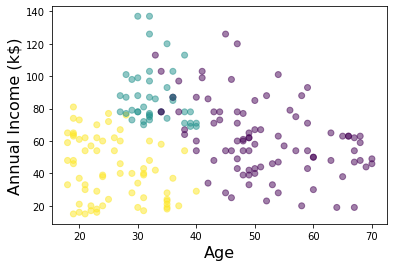

In [20]:
# 1.plotting and showing distribution of customers based on their age and annual income: 
plt.scatter(x[:, 0], x[:, 1] ,c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.show()

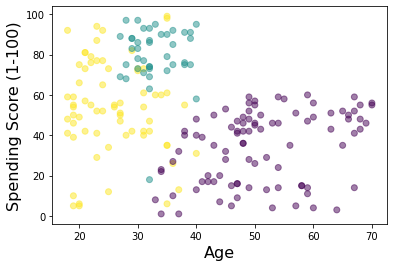

In [22]:
# 2.plotting and showing distribution of customers based on their age and annual Spending Score (1-100): 
plt.scatter(x[:, 0], x[:, 2] ,c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.show()

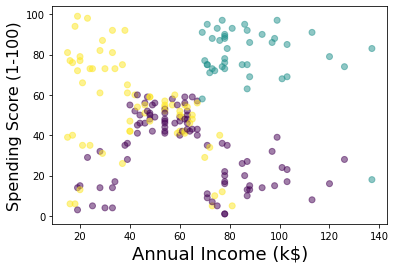

In [23]:
# 3.plotting and showing distribution of customers based on their Annual Income (k$) and annual Spending Score (1-100): 
plt.scatter(x[:, 1], x[:, 2] ,c=labels, alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.show()

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_4764/3416838228.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


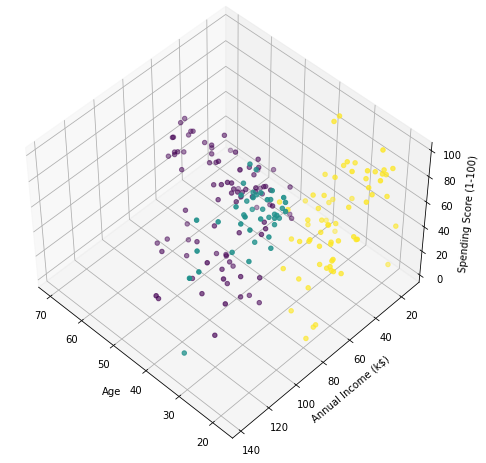

In [27]:
# 3.plotting and showing distribution of customers based on their Age Annual Income (k$) and annual Spending Score (1-100)
# in a 3D plot
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c= labels)


## [model2]>>>considering Gender

In [57]:
# turning Gender values into int
Gender = cust_df2['Gender'].replace(['Female','Male'],[0,1],inplace=True)
print(Gender)

None


In [58]:
cust_df2 = cust_df2.rename({'Annual Income (k$)': 'anin', 'Spending Score (1-100)': 'spsc'}, axis=1)
cust_df2

,CustomerID,Gender,Age,anin,spsc
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [59]:
cust_df2.dtypes

CustomerID    int64
Gender        int64
Age           int64
anin          int64
spsc          int64
dtype: object

In [60]:
print(cust_df2.values[:,0:])

[[  1   1  19  15  39]
 [  2   1  21  15  81]
 [  3   0  20  16   6]
 [  4   0  23  16  77]
 [  5   0  31  17  40]
 [  6   0  22  17  76]
 [  7   0  35  18   6]
 [  8   0  23  18  94]
 [  9   1  64  19   3]
 [ 10   0  30  19  72]
 [ 11   1  67  19  14]
 [ 12   0  35  19  99]
 [ 13   0  58  20  15]
 [ 14   0  24  20  77]
 [ 15   1  37  20  13]
 [ 16   1  22  20  79]
 [ 17   0  35  21  35]
 [ 18   1  20  21  66]
 [ 19   1  52  23  29]
 [ 20   0  35  23  98]
 [ 21   1  35  24  35]
 [ 22   1  25  24  73]
 [ 23   0  46  25   5]
 [ 24   1  31  25  73]
 [ 25   0  54  28  14]
 [ 26   1  29  28  82]
 [ 27   0  45  28  32]
 [ 28   1  35  28  61]
 [ 29   0  40  29  31]
 [ 30   0  23  29  87]
 [ 31   1  60  30   4]
 [ 32   0  21  30  73]
 [ 33   1  53  33   4]
 [ 34   1  18  33  92]
 [ 35   0  49  33  14]
 [ 36   0  21  33  81]
 [ 37   0  42  34  17]
 [ 38   0  30  34  73]
 [ 39   0  36  37  26]
 [ 40   0  20  37  75]
 [ 41   0  65  38  35]
 [ 42   1  24  38  92]
 [ 43   1  48  39  36]
 [ 44   0  

In [61]:
# Normalizing over the standard deviation
# considering col age , anin , spsc (neglecting gender)
from sklearn.preprocessing import StandardScaler
x = cust_df2.values[:,1:]
Clus_dataSet2 = StandardScaler().fit_transform(x)
Clus_dataSet2

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [64]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet2)
labels = k_means.labels_
print(labels)

[0 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1
 0 1 0 1 0 2 0 1 0 1 1 1 1 1 0 1 2 1 2 1 2 1 2 2 0 1 1 2 0 1 1 0 1 2 1 1 1
 2 0 1 2 0 1 2 2 2 1 0 2 1 0 1 1 1 0 2 1 1 0 1 1 2 0 1 1 2 0 2 1 1 2 2 2 2
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0
 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 1
 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0]


In [65]:
cust_df2["Clus_kmeans"] = labels
cust_df2.head()

,CustomerID,Gender,Age,anin,spsc,Clus_kmeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,0
4,5,0,31,17,40,1


In [66]:
cust_df2.groupby('Clus_kmeans').mean()

,CustomerID,Gender,Age,anin,spsc
Clus_kmeans,,,,,
0,105.225000,0.4875,28.150000,62.050000,74.387500
1,92.422535,0.0000,43.760563,57.718310,37.070423
2,104.489796,1.0000,49.204082,62.244898,29.734694


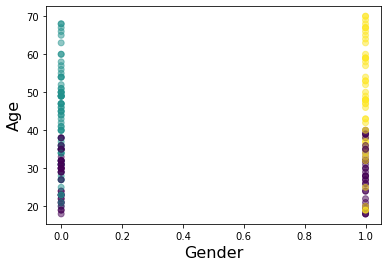

In [68]:
# 1.plotting and showing distribution of customers based on their gender and age : 
plt.scatter(x[:, 0], x[:, 1] ,c=labels, alpha=0.5)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

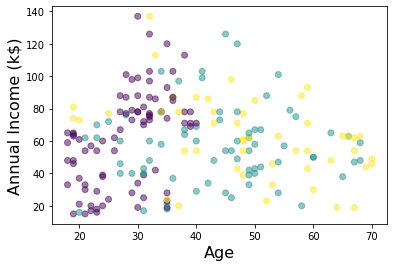

In [69]:
# 1.plotting and showing distribution of customers based on their age and annual income: 
plt.scatter(x[:, 1], x[:, 2] ,c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.show()

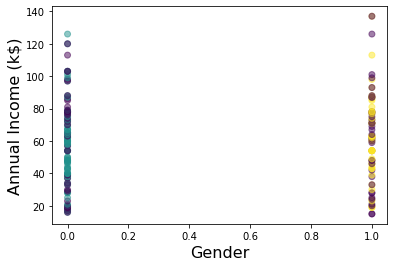

In [71]:
# 1.plotting and showing distribution of customers based on their gender and annual income: 
plt.scatter(x[:, 0], x[:, 2] ,c=labels, alpha=0.5)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.show()

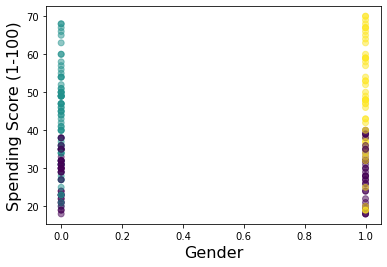

In [73]:
# 1.plotting and showing distribution of customers based on their gender and Spending Score (1-100): 
plt.scatter(x[:, 0], x[:, 1] ,c=labels, alpha=0.5)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.show()

In [ ]:
# what if we had 4 classes/categories??????

In [74]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet2)
labels = k_means.labels_
print(labels)

[2 2 0 3 0 3 0 3 1 3 1 3 0 3 1 2 0 2 1 3 1 2 0 2 0 2 0 2 0 3 1 3 1 2 0 3 0
 3 0 3 0 2 1 3 0 3 0 3 3 3 0 2 3 1 0 1 0 1 3 1 1 2 0 0 1 2 0 0 2 3 1 0 0 0
 1 2 0 1 3 0 1 2 1 0 3 1 0 3 3 0 0 2 1 0 3 2 0 3 1 2 3 0 1 2 1 3 0 1 1 1 1
 3 0 2 3 3 0 0 0 0 2 0 3 2 3 3 1 2 1 2 1 2 3 3 2 3 0 2 2 3 0 2 3 3 1 2 1 3
 0 2 1 2 0 3 0 3 1 3 1 3 0 3 2 3 1 3 1 3 0 2 1 2 1 2 0 3 1 2 1 2 0 3 1 3 0
 2 0 2 0 3 0 3 1 3 0 3 0 2 1 2]


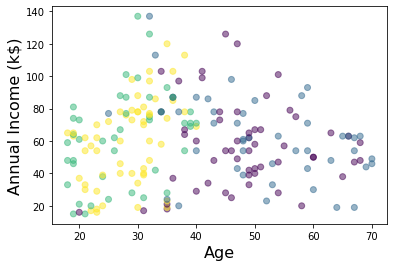

In [75]:
plt.scatter(x[:, 1], x[:, 2] ,c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.show()

In [ ]:
# lets try 2 classes/categories

In [76]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet2)
labels = k_means.labels_
print(labels)

[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


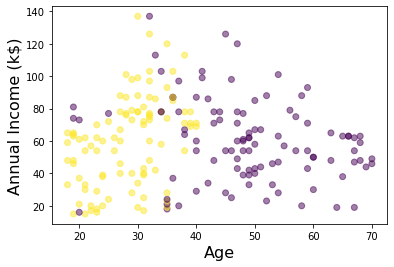

In [77]:
plt.scatter(x[:, 1], x[:, 2] ,c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.show()

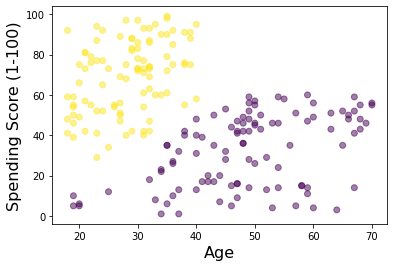

In [78]:
plt.scatter(x[:, 1], x[:, 3] ,c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.show()

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_4764/440849363.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


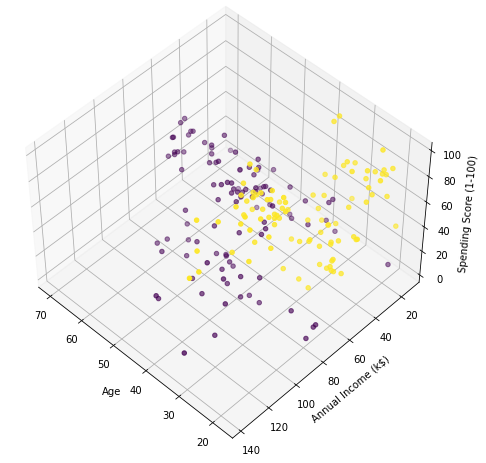

In [80]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

ax.scatter(x[:, 1], x[:, 2], x[:, 3], c= labels)

# CONCLUSION

#### it is clear that in such a small and unorganized dataset it is better to categorize data into less clusters,i.e 2 clusters